# Visualização de dados

Uma visualização gráfica dos dados auxilia na identificação de possíveis padrões e na tomada de decisões dos pré-processamentos a serem realizados nos dados. Nem sempre é necessário criar gráficos para todo o *dataset*. Precisamos de gráficos suficientes ter uma ideia do formato geral dos dados (uma amostra).

Antes de plotar os gráficos, é preciso conhecê-los. Estaremos utilizando neste `notebook` um *dataset* com dados EMG coletados de dez voluntários, porém iremos plotar em gráficos apenas os dados de um único voluntário. Neste *dataset* foram coletados 10 movimentos diferentes com dois canais EMG. Iremos plotar um gráfico para cada canal, para cada movimento.

Utilizaremos a biblioteca [matplotlib](https://matplotlib.org) para gerar os gráficos.

In [1]:
# Carregando dados
import numpy as np

data = np.load('./lib/data/converted/s1.npy')
print(f'{data.shape} - (classes, ensaios, canais, linhas)')

(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)


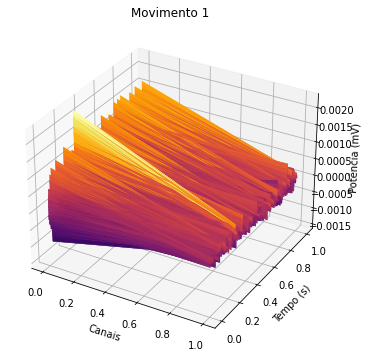

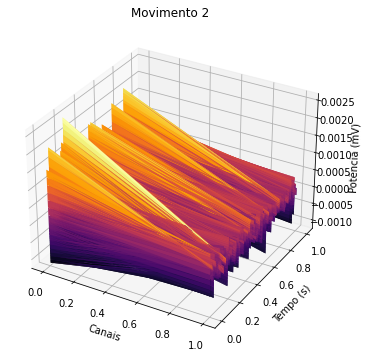

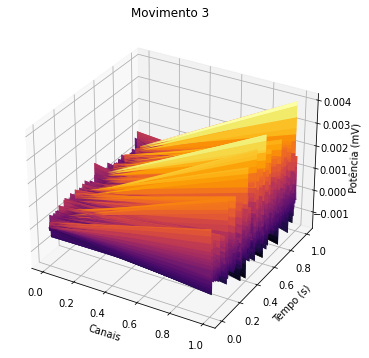

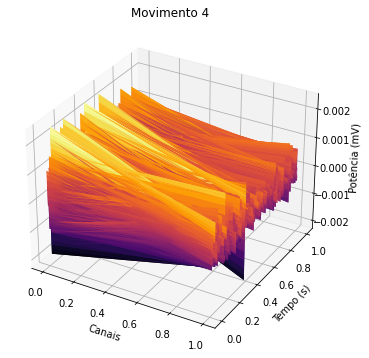

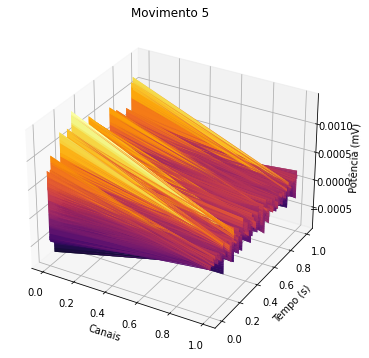

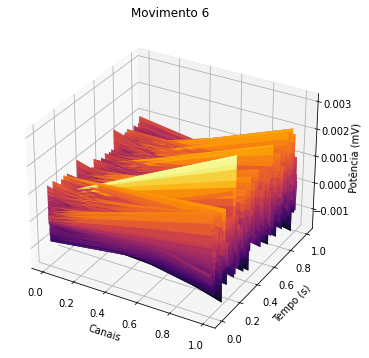

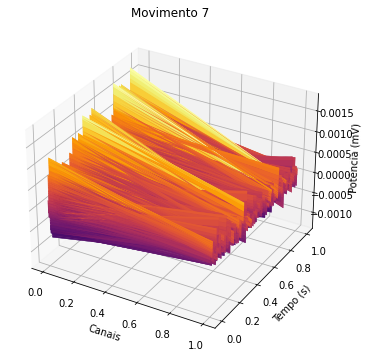

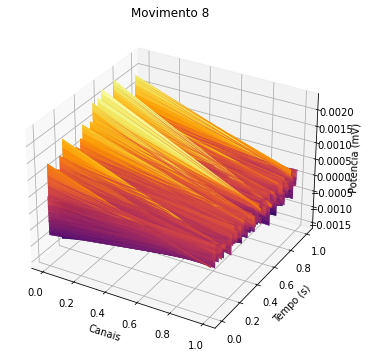

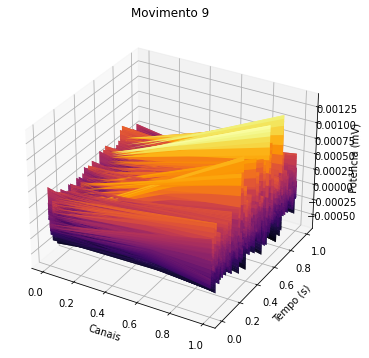

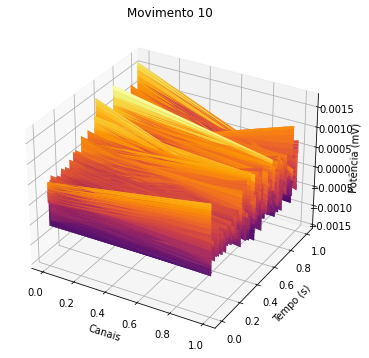

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams

rcParams['figure.figsize'] = [18., 6.]

for mov in range(10):
    plot_data = []
    for channel in range(2):
        # espaço de 4000 pontos entre 0 e 1
        for i, t in enumerate(np.linspace(0, 1, 4000)):
            plot_data.append([channel, t, data[mov][0][channel][i]])
    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax = plt.axes(projection ='3d')
    ax.set_title('Movimento {}'.format(mov + 1))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()

O trecho de código acima, está imprimindo os gráficos dos 10 movimentos apresentados. Porém, é mostrado somente o 1º segundo (primeiros 4.000 pontos equivalentes a 1 segundo) do 1º ensaio.

Isto ocorre, pois se apresentarmos os 5 segundos de experimento, o gráfico terá um peso visual muito maior (20.000 pontos * 2 canais = 40.000 pontos) e demorará muito para mostrar o gráfico dos 10 movimentos.

Como a visualização serve aqui como título de comparação entre os movimentos, não há a necessidade de mostrar todos os pontos. Assim, se faz necessário a apresentação de uma amostra desses pontos.

Todavia, o trecho acima mostra o 1º segundo de cada movimento, o que pode ser ruim, se o movimento possui maior diferenciação um do outro ao longo dos 5 segundos.

Para resolver esse impasse, sugere-se que seja obtido uma amostra dos pontos ao longo dos 5 segundos. Para isso, pode ser utilizanda uma técnica chamada de `resample` (do inglês, reamostragem) do sinal:

(10, 6, 2, 1000)


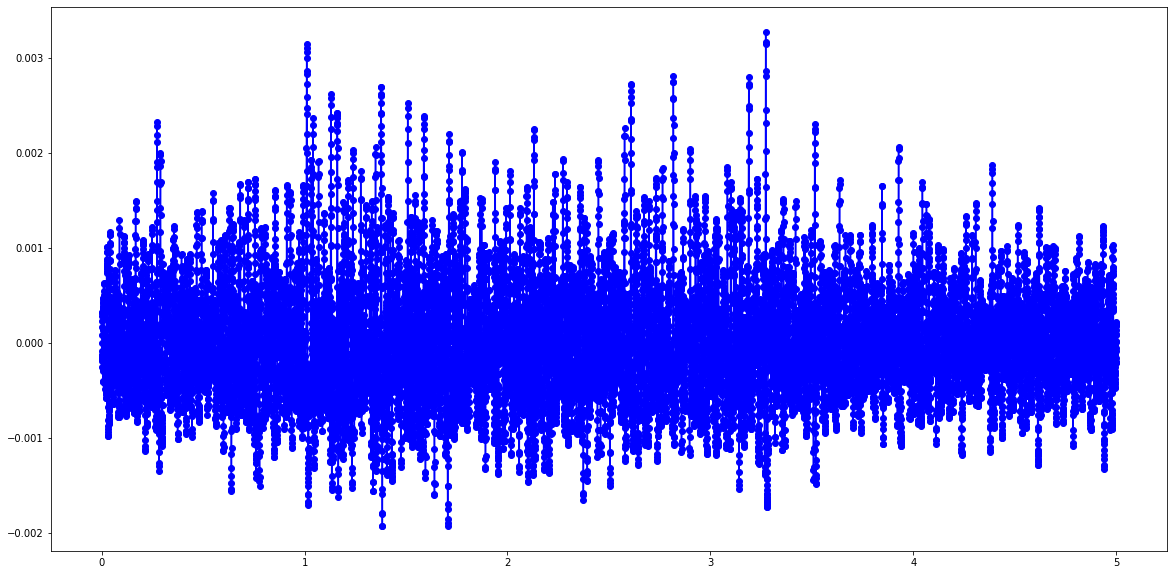

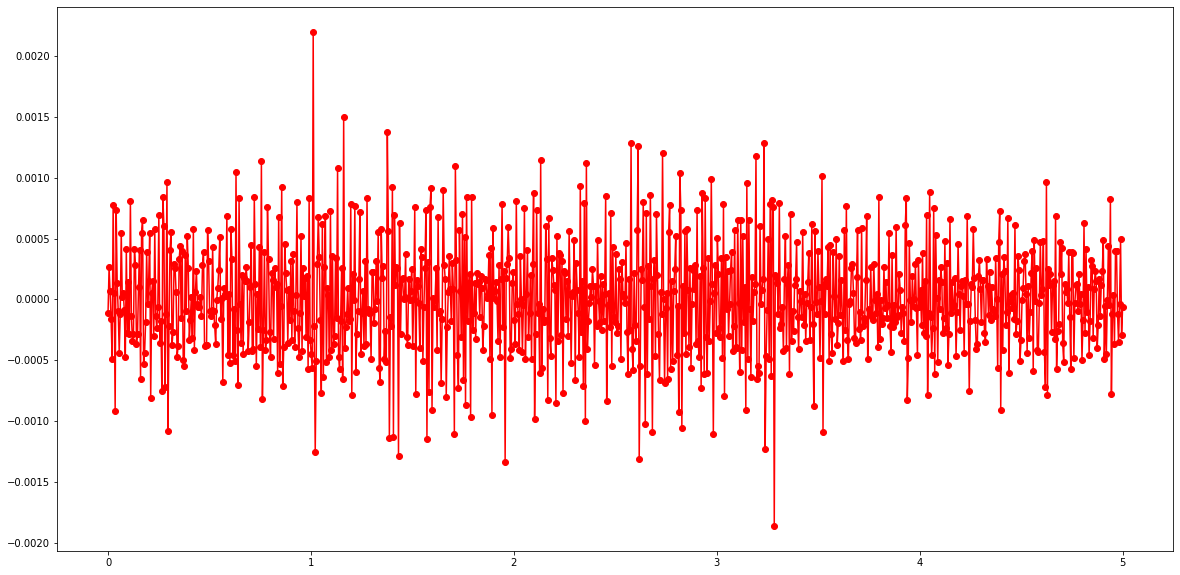

In [3]:
from scipy import signal, fft

# ordem do downsample
do = 20
npts = 20000
rnpts = int(npts / do)

# resample
rdata = signal.resample(data, rnpts, axis=-1)
print(rdata.shape)

rcParams['figure.figsize'] = [20., 10.]

y = data[0,0,0,:]
x = np.linspace(0, 5, npts)

yre = rdata[0,0,0,:]
xre = np.linspace(0, 5, rnpts)

plt.plot(x, y, 'ob-')
plt.show()
plt.plot(xre, yre, 'or-')
plt.show()

**Desafio:** Refazer a comparação dos gráficos dos movimentos e tentar comparar ensaios diferentes lado a lado, de forma a observar semelhanças ou disparidades. Mostre os gráficos normais, os gráficos com `resample`.

É interessante observar o dado também no domínio da frequência, através da transformada de fourier (fft). Utilizando `scipy`, basta chamar `scipy.fft.fft(dado, axis=-1)` para termos a fft. A seguir é implementado os gráficos da fft para os dados normais e para os dados de *resample*.

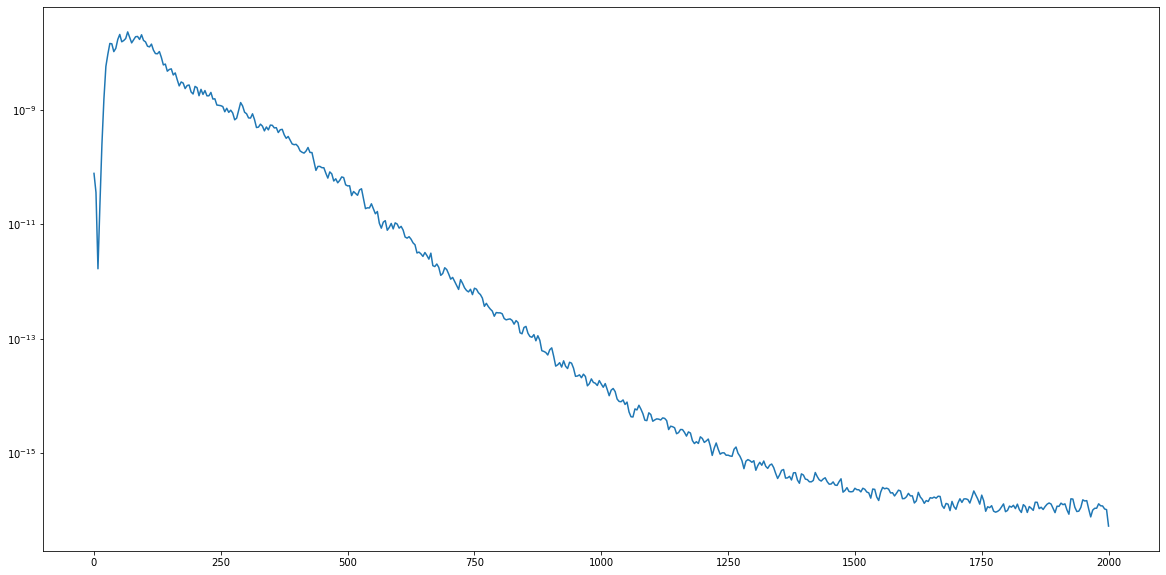

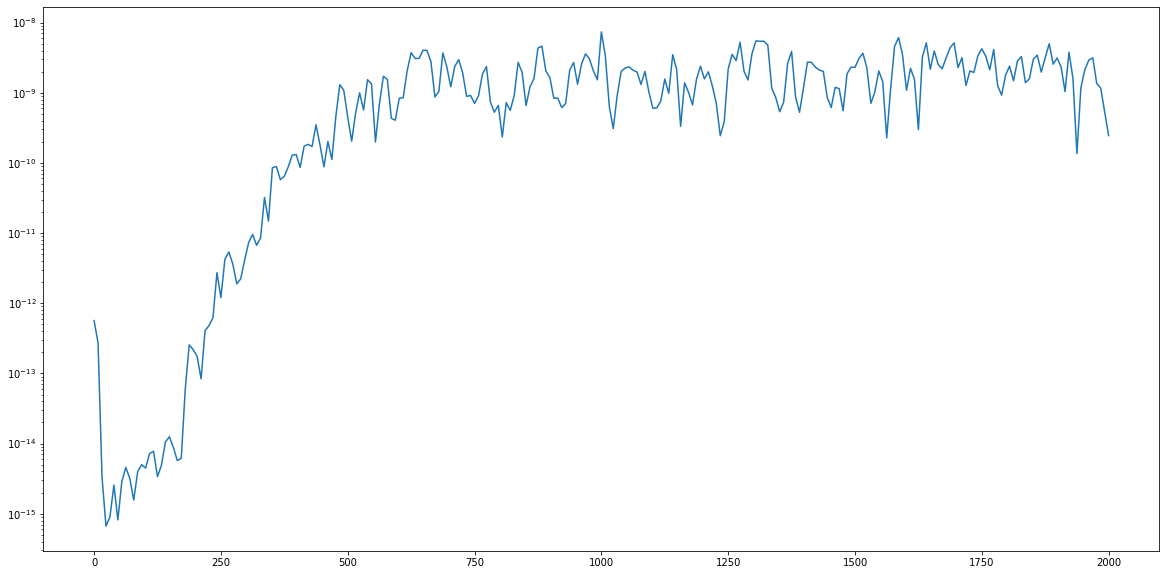

In [4]:
from scipy import signal

f, w = signal.welch(y, 4000, nperseg=1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, w)
plt.show()

f, w = signal.welch(yre, 4000, nperseg=512, scaling='spectrum')
plt.figure()
plt.semilogy(f, w)
plt.show()

**Desafio:** Refazer a comparação dos gráficos dos movimentos e tentar comparar ensaios diferentes lado a lado, de forma a observar semelhanças ou disparidades. Mostre os gráficos de fft para os dados normais e para os dados com `resample`.

O espectograma dos dados do *resample* pode ser obtivo utilizando a função  `specgram` do `matplotlib`, como demonstrado a seguir:

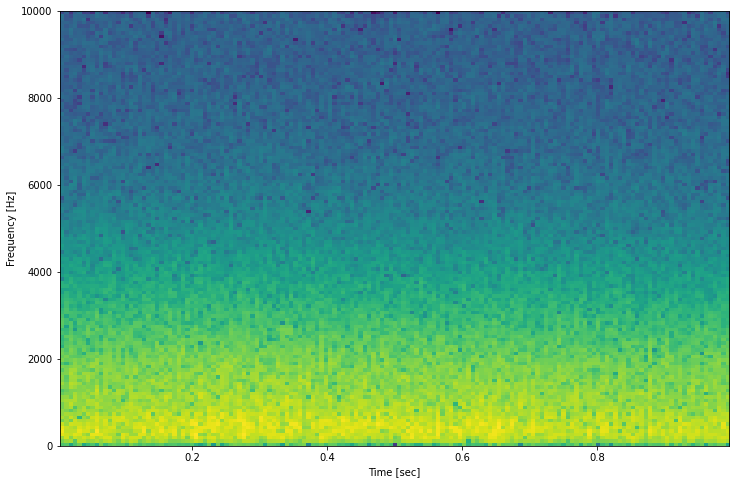

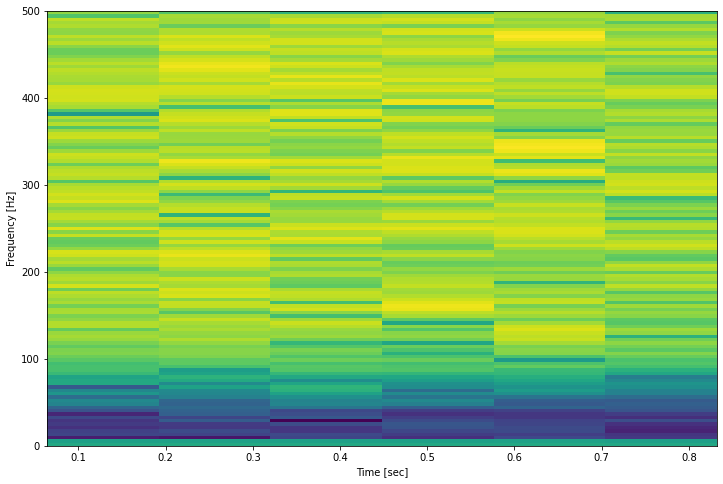

In [5]:
rcParams['figure.figsize'] = [12., 8.]
plt.specgram(data[0,0,0,:], Fs=npts)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.specgram(rdata[0,0,0,:], Fs=rnpts)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Desafio:** Refazer a comparação dos gráficos dos movimentos e tentar comparar ensaios diferentes lado a lado, de forma a observar semelhanças ou disparidades. Mostre os gráficos de espectograma para os dados normais e para os dados com `resample`.